# EDA - 📈 USED CARS PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold


# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('craigslistVehicles.csv')

# 1. Overview

In [3]:
df.shape

(525839, 22)

In [4]:
display(df.head())
display(df.tail())

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://grandrapids.craigslist.org/cto/d/hasti...,"grand rapids, MI",https://grandrapids.craigslist.org,1500,2006.0,cadillac,cts,good,6 cylinders,gas,...,automatic,NaN,rwd,mid-size,coupe,blue,https://images.craigslist.org/00K0K_a9CZoZg2U8...,"2006 CtS Leather, Runs and drives Good.236k mil",42.643000,-85.293700
1,https://grandrapids.craigslist.org/cto/d/grand...,"grand rapids, MI",https://grandrapids.craigslist.org,8900,2009.0,lincoln,mkx,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00a0a_9B4kPBDIWd...,"Selling our loaded 2009 Lincoln MKX with 119,0...",42.973700,-85.726500
2,https://grandrapids.craigslist.org/ctd/d/chesa...,"grand rapids, MI",https://grandrapids.craigslist.org,7995,2010.0,cadillac,srx premium collection,NaN,NaN,gas,...,automatic,3GYFNCEYXAS552363,NaN,NaN,NaN,NaN,https://images.craigslist.org/00X0X_8i0VRuk7Cv...,WE HAVE OVER 400 VEHICLES IN STOCK!\n\n View O...,43.186723,-84.163862
3,https://grandrapids.craigslist.org/ctd/d/chesa...,"grand rapids, MI",https://grandrapids.craigslist.org,6995,2007.0,NaN,hummer h3 4dr 4wd suv,NaN,NaN,gas,...,automatic,5GTDN13E478107380,NaN,NaN,NaN,NaN,https://images.craigslist.org/00b0b_ahkmUzr4cE...,WE HAVE OVER 400 VEHICLES IN STOCK!\n\n View O...,43.186723,-84.163862
4,https://grandrapids.craigslist.org/ctd/d/caled...,"grand rapids, MI",https://grandrapids.craigslist.org,20990,2010.0,ram,2500,excellent,6 cylinders,diesel,...,automatic,3D7UT2CL4AG113236,4wd,NaN,NaN,white,https://images.craigslist.org/00505_3DHY0kFrgb...,Great looking 2010 Ram 2500 ST w/6.7L 24V I6 4...,42.783714,-85.506777


,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
525834,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,11000,2002.0,jeep,wrangler,excellent,6 cylinders,gas,...,manual,NaN,4wd,NaN,NaN,white,https://images.craigslist.org/00404_e7mDrpjXlj...,"2002 Jeep wrangler with 91,000 miles. Has seve...",32.401556,-99.884713
525835,https://abilene.craigslist.org/ctd/d/lubbock-2...,"abilene, TX",https://abilene.craigslist.org,6500,2012.0,nissan,rogue s awd,good,4 cylinders,gas,...,automatic,NaN,4wd,mid-size,SUV,white,https://images.craigslist.org/00U0U_8fAEYCFBB1...,"For sale is a clean, great running/driving 201...",33.526000,-101.833300
525836,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,3000,2005.0,ford,taurus,good,6 cylinders,gas,...,automatic,NaN,fwd,mid-size,sedan,white,https://images.craigslist.org/00f0f_1jDzkAAhC9...,For Sale By Owner \n2005 White Ford Taurus SEL...,32.579641,-99.663505
525837,https://abilene.craigslist.org/ctd/d/temple-su...,"abilene, TX",https://abilene.craigslist.org,8488,2011.0,honda,accord lx sedan,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00C0C_fWL6kdm66i...,www.TEXASDIESELSTORE.com\n\nCALL OR TEXT TODAY...,31.071000,-97.389800
525838,https://abilene.craigslist.org/cto/d/roscoe-20...,"abilene, TX",https://abilene.craigslist.org,6150,2011.0,NaN,cherolet cruze lt,good,4 cylinders,gas,...,automatic,NaN,fwd,mid-size,sedan,grey,https://images.craigslist.org/00W0W_i1aq2MgfE1...,"2011 Chevrolet cruze,one owner,4cyl,auto only ...",32.432229,-100.534344


In [5]:
df.columns

Index(['url', 'city', 'city_url', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'desc', 'lat', 'long'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525839 entries, 0 to 525838
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           525839 non-null  object 
 1   city          525839 non-null  object 
 2   city_url      525839 non-null  object 
 3   price         525839 non-null  int64  
 4   year          524399 non-null  float64
 5   manufacturer  501260 non-null  object 
 6   make          517201 non-null  object 
 7   condition     279881 non-null  object 
 8   cylinders     315439 non-null  object 
 9   fuel          521544 non-null  object 
 10  odometer      427248 non-null  float64
 11  title_status  523014 non-null  object 
 12  transmission  521572 non-null  object 
 13  VIN           305650 non-null  object 
 14  drive         374475 non-null  object 
 15  size          174519 non-null  object 
 16  type          376906 non-null  object 
 17  paint_color   354306 non-null  object 
 18  imag

In [7]:
df.dtypes

url              object
city             object
city_url         object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
desc             object
lat             float64
long            float64
dtype: object

# 2. Data Cleaning

In [8]:
df.isnull().sum()

url                  0
city                 0
city_url             0
price                0
year              1440
manufacturer     24579
make              8638
condition       245958
cylinders       210400
fuel              4295
odometer         98591
title_status      2825
transmission      4267
VIN             220189
drive           151364
size            351320
type            148933
paint_color     171533
image_url            8
desc                24
lat              12221
long             12221
dtype: int64

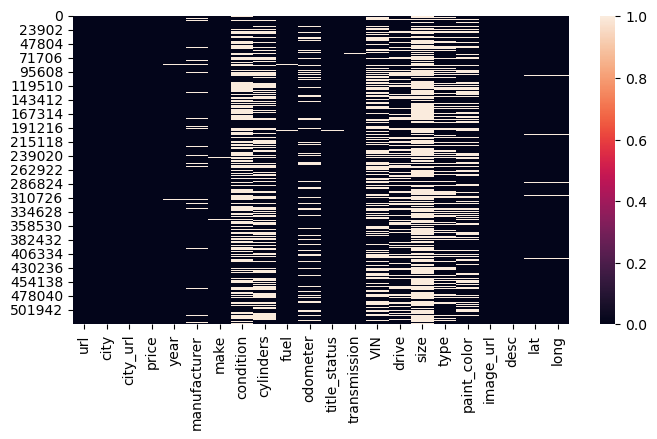

In [9]:
 plt.figure(figsize = (8, 4), facecolor = "white")

 sns.heatmap(df.isnull(), vmin = 0, vmax = 1)

plt.show()

In [10]:
df.loc[df.duplicated()]

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long


In [11]:
drop_columns = ['url', 'city', 'city_url', 'make', 'title_status', 'VIN', 'size', 'image_url', 'desc', 'lat','long']
df= df.drop(columns = drop_columns)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525839 entries, 0 to 525838
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         525839 non-null  int64  
 1   year          524399 non-null  float64
 2   manufacturer  501260 non-null  object 
 3   condition     279881 non-null  object 
 4   cylinders     315439 non-null  object 
 5   fuel          521544 non-null  object 
 6   odometer      427248 non-null  float64
 7   transmission  521572 non-null  object 
 8   drive         374475 non-null  object 
 9   type          376906 non-null  object 
 10  paint_color   354306 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 44.1+ MB


In [13]:
df['year'].nunique()

110

In [14]:
unique_values = df['year'].unique()
unique_values

array([2006., 2009., 2010., 2007., 2011., 2013., 2002., 2012., 2016.,
       2017., 2008., 2005., 2014., 2019., 2015., 2003., 2001., 2004.,
       2018., 1995., 1994., 1947., 1976., 1958., 1989., 1999., 1983.,
       1972., 1996., 2000., 1977., 1981., 1987., 1997., 1960., 1970.,
       1998., 1968., 1955., 1993., 1984., 1986., 1988., 1982., 2020.,
       1965., 1966., 1948., 1991., 1985., 1900., 1963., 1971., 1929.,
       1967., 1939., 1978., 1979., 1973., 1992., 1990., 1974., 1980.,
       1934., 1950., 1964., 1969., 1961., 1940., 1956., 1930., 1949.,
       1941., 1952.,   nan, 1953., 1957., 1946., 1975., 1962., 1959.,
       1931., 1937., 1951., 1928., 1925., 1954., 1935., 1933., 1932.,
       1938., 1926., 1936., 1905., 1923., 1919., 1943., 1922., 1901.,
       1917., 1927., 1942., 1945., 1920., 1914., 1921., 1913., 1924.,
       1944., 1916., 1915.])

In [15]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
1,8900,2009.0,lincoln,NaN,NaN,gas,119000.0,automatic,NaN,NaN,NaN
2,7995,2010.0,cadillac,NaN,NaN,gas,129105.0,automatic,NaN,NaN,NaN
3,6995,2007.0,NaN,NaN,NaN,gas,164296.0,automatic,NaN,NaN,NaN
4,20990,2010.0,ram,excellent,6 cylinders,diesel,123213.0,automatic,4wd,NaN,white


In [16]:
df.dropna(inplace=True)

In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

,index,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
1,5,4950,2010.0,subaru,good,4 cylinders,gas,253000.0,automatic,4wd,sedan,white
2,6,6850,2007.0,gmc,good,8 cylinders,gas,254000.0,automatic,4wd,wagon,black
3,7,7995,2007.0,lexus,excellent,6 cylinders,gas,146111.0,automatic,fwd,sedan,white
4,8,4995,2011.0,hyundai,excellent,4 cylinders,gas,115048.0,automatic,fwd,sedan,blue


In [19]:
df.columns

Index(['index', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [20]:
df.drop([ 'index'],inplace=True,axis=1)

In [21]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
1,4950,2010.0,subaru,good,4 cylinders,gas,253000.0,automatic,4wd,sedan,white
2,6850,2007.0,gmc,good,8 cylinders,gas,254000.0,automatic,4wd,wagon,black
3,7995,2007.0,lexus,excellent,6 cylinders,gas,146111.0,automatic,fwd,sedan,white
4,4995,2011.0,hyundai,excellent,4 cylinders,gas,115048.0,automatic,fwd,sedan,blue


In [22]:
df['year'].astype(int)

0         2006
1         2010
2         2007
3         2007
4         2011
          ... 
144898    2005
144899    2005
144900    2005
144901    2012
144902    2005
Name: year, Length: 144903, dtype: int64

# 3.VISUALIZATION

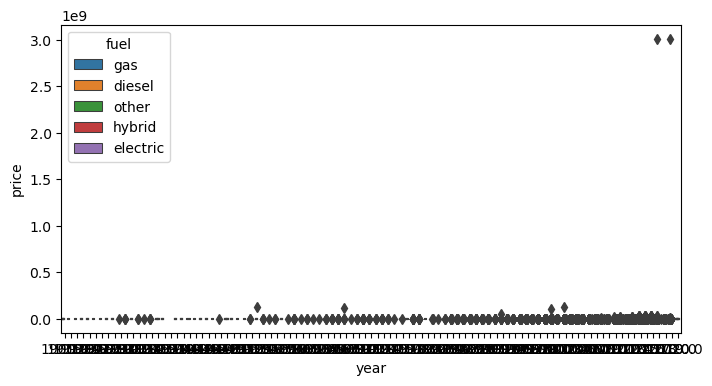

In [23]:
plt.figure(figsize = (8,4), facecolor = "white")

sns.boxplot(
    data = df, 
    x = 'year', y = 'price',hue='fuel'
)

plt.show()

In [24]:
new_df=df.copy(deep=True)
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
1,4950,2010.0,subaru,good,4 cylinders,gas,253000.0,automatic,4wd,sedan,white
2,6850,2007.0,gmc,good,8 cylinders,gas,254000.0,automatic,4wd,wagon,black
3,7995,2007.0,lexus,excellent,6 cylinders,gas,146111.0,automatic,fwd,sedan,white
4,4995,2011.0,hyundai,excellent,4 cylinders,gas,115048.0,automatic,fwd,sedan,blue
...,...,...,...,...,...,...,...,...,...,...,...
144898,3850,2005.0,ford,excellent,4 cylinders,gas,103000.0,automatic,fwd,sedan,brown
144899,4000,2005.0,toyota,good,4 cylinders,gas,54343.0,automatic,rwd,truck,black
144900,7000,2005.0,ford,excellent,8 cylinders,gas,150000.0,manual,rwd,coupe,black
144901,6500,2012.0,nissan,good,4 cylinders,gas,99950.0,automatic,4wd,SUV,white


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144903 entries, 0 to 144902
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         144903 non-null  int64  
 1   year          144903 non-null  float64
 2   manufacturer  144903 non-null  object 
 3   condition     144903 non-null  object 
 4   cylinders     144903 non-null  object 
 5   fuel          144903 non-null  object 
 6   odometer      144903 non-null  float64
 7   transmission  144903 non-null  object 
 8   drive         144903 non-null  object 
 9   type          144903 non-null  object 
 10  paint_color   144903 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB


In [26]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [27]:
numerics

['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [28]:
categorical_columns

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'transmission',
 'drive',
 'type',
 'paint_color']

In [29]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,6,2,5,2,236000.0,0,2,3,1
1,4950,2010.0,36,2,3,2,253000.0,0,0,9,10
2,6850,2007.0,14,2,6,2,254000.0,0,0,12,0
3,7995,2007.0,23,0,5,2,146111.0,0,1,9,10
4,4995,2011.0,17,0,3,2,115048.0,0,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...
144898,3850,2005.0,13,0,3,2,103000.0,0,1,9,2
144899,4000,2005.0,37,2,3,2,54343.0,0,2,10,0
144900,7000,2005.0,13,0,6,2,150000.0,1,2,3,0
144901,6500,2012.0,30,2,3,2,99950.0,0,0,0,10


In [30]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,6,2,5,2,236000.0,0,2,3,1
1,4950,2010.0,36,2,3,2,253000.0,0,0,9,10
2,6850,2007.0,14,2,6,2,254000.0,0,0,12,0
3,7995,2007.0,23,0,5,2,146111.0,0,1,9,10
4,4995,2011.0,17,0,3,2,115048.0,0,1,9,1


In [31]:

df['odometer'] = df['odometer'].astype(int)

<Axes: >

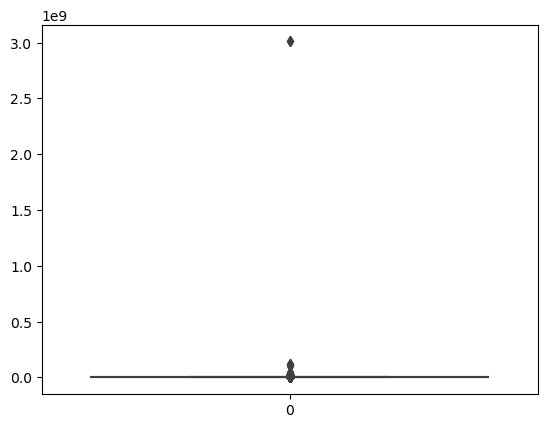

In [32]:
sns.boxplot(df.price)

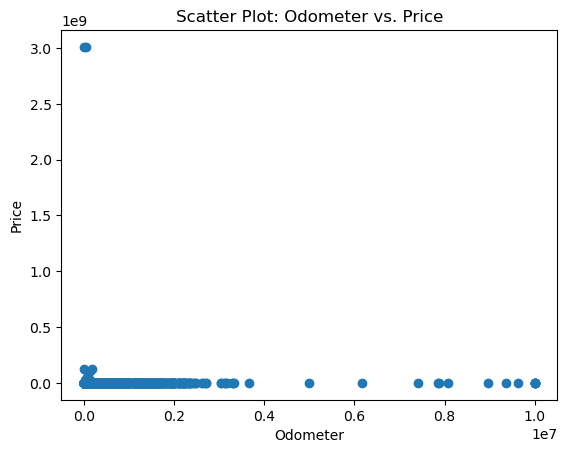

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df['odometer'], df['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot: Odometer vs. Price')
plt.show()


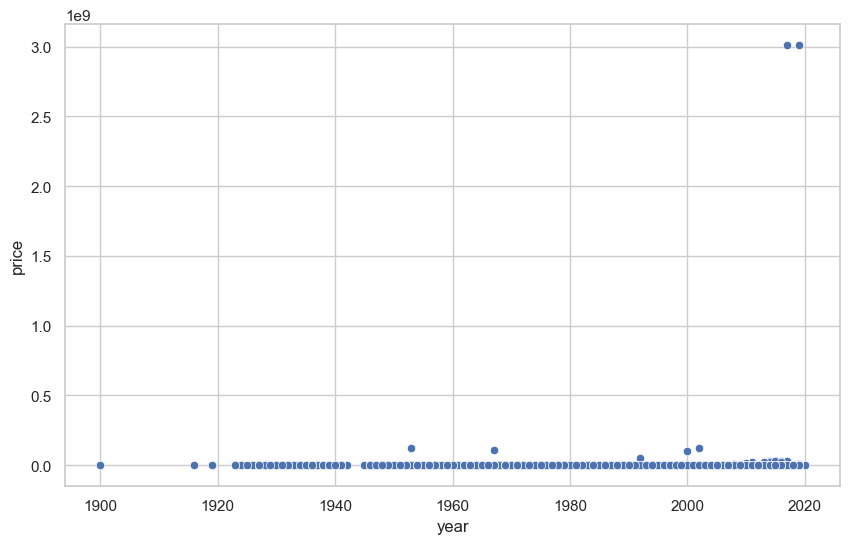

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x='year', y='price', data=df, palette='viridis')

plt.show()


In [35]:
odometer_price_correlation = df['odometer'].corr(df['price'])

print(f"Correlation between 'odometer' and 'price': {odometer_price_correlation}")

Correlation between 'odometer' and 'price': -0.002898025899753418


<Figure size 1000x600 with 0 Axes>

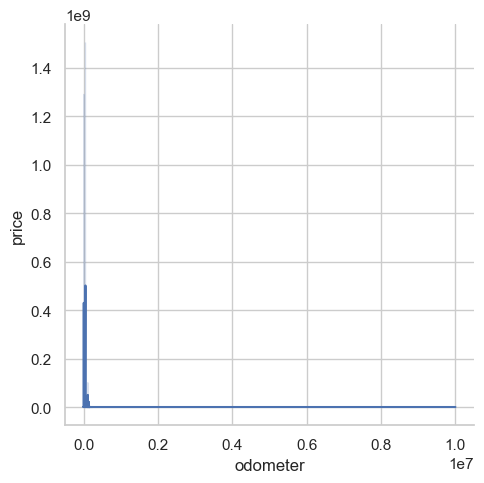

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.relplot(x='odometer', y='price', kind='line', data=df)



In [37]:
df.corr()


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.000000,0.003817,0.003274,-0.003784,-0.001120,0.000693,-0.002898,-0.001309,0.000662,0.000840,0.002284
year,0.003817,1.000000,0.034244,-0.058191,-0.156134,0.019117,-0.199138,-0.069687,-0.190830,0.013444,0.017312
manufacturer,0.003274,0.034244,1.000000,-0.011213,-0.239730,-0.004957,0.010220,0.041193,-0.090305,0.009909,-0.008038
condition,-0.003784,-0.058191,-0.011213,1.000000,0.018652,0.011446,0.022990,0.058770,0.047215,0.034652,0.012924
cylinders,-0.001120,-0.156134,-0.239730,0.018652,1.000000,-0.152749,0.064086,-0.079895,-0.056933,0.038899,0.025241
fuel,0.000693,0.019117,-0.004957,0.011446,-0.152749,1.000000,-0.068983,0.031949,0.098198,-0.166177,-0.057077
odometer,-0.002898,-0.199138,0.010220,0.022990,0.064086,-0.068983,1.000000,-0.038278,-0.011578,0.007029,0.011456
transmission,-0.001309,-0.069687,0.041193,0.058770,-0.079895,0.031949,-0.038278,1.000000,0.054359,-0.009329,-0.029733
drive,0.000662,-0.190830,-0.090305,0.047215,-0.056933,0.098198,-0.011578,0.054359,1.000000,0.128616,0.071114
type,0.000840,0.013444,0.009909,0.034652,0.038899,-0.166177,0.007029,-0.009329,0.128616,1.000000,0.068069


# 4.LOGISTIC REGRESSION

In [38]:
test = 'price'
y = df[test]
X = df.drop([test], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)

plt.title('Logistic Regression Decision Boundary')
plt.show()


NameError: name 'accuracy_score' is not defined

# 5.DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


# 6.RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)